# Введение
Моя диссертационная работа посвящена разработке маркетинговой стратегии для продвижения и популяризации автоспорта в России. Однако, для того, чтобы в полной мере понять, какая система нужна для построения стратегии, для начала необходимо разобраться, как устроен мировой автоспорт. Наиболее успешным и пользующимся популярностью среди широких масс чемпионатом по автогонкам считается "Формула-1". Пример и бизнес-модель данного соревнования пытаются перенять многие доругие гоночные серии, поэтому не обратить внимание на данный Чемпионат в контексте нашего исследования просто невозможно. В данной работе мы рассмотрим датасет появщенный популярности определенных соревнований среди болельщиков. И попробуем подтвердить или опровергнуть две гипотезы. 


**Обозначения в таблице**

**Год** - в какой год состоялась гонка

**Номер** - номер гонки по счету 

**Название ГП** - какое название носила гонка (в Формуле-1 каждая гонка носит название 
места проведения, например, гран-при России, гран-при Испании)

**Первое-третье место** - кто из гонщиков получил какое место в данной гонке 

**Рейтинг** - средняя оценка болельщиками того или иного гран-при

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("formula-1.csv")

Для начала приведем таблицу в порядок и назовем столбцы так, как нам будет удобнее. Как можно заметить, датасет совсем небольшой, однако постараемся извлечь из него максимум.

In [4]:
df
df.columns = ['ГОД','НОМЕР','НАЗВАНИЕ ГП', 'ПЕРВОЕ МЕСТО', 'ВТОРОЕ МЕСТО', 'ТРЕТЬЕ МЕСТО', 'РЕЙТИНГ']
df

,ГОД,НОМЕР,НАЗВАНИЕ ГП,ПЕРВОЕ МЕСТО,ВТОРОЕ МЕСТО,ТРЕТЬЕ МЕСТО,РЕЙТИНГ
0,2008,1,Australian GP,Hamilton,Heidfeld,Rosberg,7.609
1,2008,10,German GP,Hamilton,Piquet,Massa,7.180
2,2008,11,Hungarian GP,Kovalainen,Glock,Raikkonen,6.202
3,2008,12,European GP,Massa,Hamilton,Kubica,3.977
4,2008,13,Belgian GP,Massa,Heidfeld,Hamilton,7.736
...,...,...,...,...,...,...,...
197,2018,5,Spanish GP,Hamilton,Bottas,Verstappen,4.850
198,2018,6,Monaco GP,Ricciardo,Vettel,Hamilton,5.230
199,2018,7,Canadian GP,Vettel,Bottas,Verstappen,4.240
200,2018,8,French GP,Hamilton,Verstappen,Raikkonen,6.470


### Гипотеза 1

*За последние годы Ф1 (2017-2018) Ф1 начала пользоваться МЕНЬШЕЙ популярностью среди болельщиков чем за период с 2008 по 2017*

Среди поклонников Формулы-1 бытует мнение о том, что это уже не те гонки, которые были раньше, изменение регламента и руководства Чемпионата якобы негативно сказалось на популярности гонок. Так ли это? Давайте проверим. 

In [7]:
last_years = df[df['ГОД'] >= 2017]
prev_period = df[df['ГОД'] <= 2017]

In [8]:
last_years_rating = last_years['РЕЙТИНГ'].mean()
prev_period_rating = prev_period['РЕЙТИНГ'].mean()

print("2017-2018 (mean) rating is", last_years_rating)
print("2008-2017 (mean) rating is", prev_period_rating)

2017-2018 (mean) rating is 6.695454545454545
2008-2017 (mean) rating is 6.7913650793650815


Видим, что раньше рейтинг был чуть лучше. Однако расхождение в 0.1 кажется не совсем показательным.

Построим график:

Text(0.5, 1.0, 'Зависимость рейтинга от года')

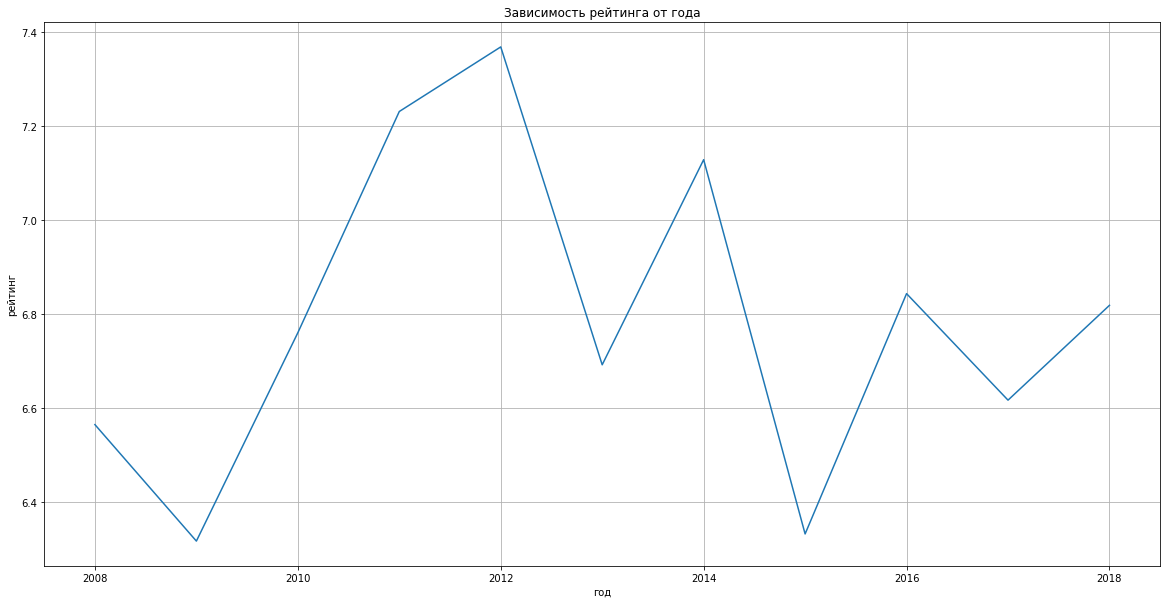

In [9]:
years = [i for i in range(2008, 2018 + 1)]
ratings = [df[df['ГОД'] == year]['РЕЙТИНГ'].mean() for year in years]

plt.figure(figsize=(20, 10))
plt.plot(years, ratings)
plt.grid()
plt.xlabel("год")
plt.ylabel("рейтинг")
plt.title('Зависимость рейтинга от года')

Как видно из графика, пик популярности гонок среди болельщиков был в 2010-2012 годах (макс. рейтинг около 7.4), а позже начал показывать сильное падение. Возможно, дело в том, что сами гонки стали менее зрелищными и более предсказуемыми. Для полного подтверждения правоты этой гипотезы в будущем мы проведем дополнительный опрос аудитории Ф-1.

### Гипотеза 2

*Рейтинг гонки зависит от конкретного именитого гонщика*

Вторая популярная фраза болельщиков Формулы-1 - "многие смотрят гонки только ради конкретных гонщиков и как только они завершают карьеру или их результаты начинают сильно ухудшатся - они перестают и вовсе смотреть гонки. 

Проверим. В данной гипотезе мы рассмотрим трех наиболее популярных гонщиков 2010-х годов, обладателей различных личных и командных рекордов - Хэмильтона, Алонсо и Феттеля

1. Рассмотрим топ-10 гонок по рейтингу

In [10]:
df.sort_values(by=['РЕЙТИНГ'], ascending=False).head(10)

,ГОД,НОМЕР,НАЗВАНИЕ ГП,ПЕРВОЕ МЕСТО,ВТОРОЕ МЕСТО,ТРЕТЬЕ МЕСТО,РЕЙТИНГ
85,2012,20,Brazilian GP,Button,Alonso,Massa,9.449
66,2011,3,Chinese GP,Hamilton,Vettel,Webber,9.241
127,2014,7,Canadian GP,Ricciardo,Rosberg,Vettel,9.190
114,2014,11,Hungarian GP,Ricciardo,Alonso,Hamilton,9.140
131,2015,10,Hungarian GP,Vettel,Kvyat,Ricciardo,9.110
137,2015,16,United States GP,Hamilton,Rosberg,Vettel,9.100
70,2011,7,Canadian GP,Button,Vettel,Webber,9.095
123,2014,3,Bahrain GP,Hamilton,Rosberg,Perez,9.095
82,2012,18,Abu Dhabi GP,Raikkonen,Alonso,Vettel,8.854
187,2017,8,Azerbaijan GP,Ricciardo,Bottas,Stroll,8.800


Найдем следующую величину для каждого из гонщиков - средний рейтинг по всем гонкам, в которых гонщик занял призовое место

In [15]:
racer_ratings = {}

racer_mean = {}

for index, row in df.iterrows():
    for racer in [row["ПЕРВОЕ МЕСТО"], row["ВТОРОЕ МЕСТО"], row["ТРЕТЬЕ МЕСТО"]]:
        if racer_ratings.get(racer) == None:
            racer_ratings[racer] = []
        racer_ratings[racer].append(row["РЕЙТИНГ"])

for key, value in racer_ratings.items():
    racer_mean[key] = sum(value) / len(value)
racer_mean

{'Hamilton': 6.800610619469029,
 'Heidfeld': 7.396166666666666,
 'Rosberg': 6.644836363636363,
 'Piquet': 7.18,
 'Massa': 6.417375,
 'Kovalainen': 6.697666666666667,
 'Glock': 5.607333333333333,
 'Raikkonen': 6.842900000000002,
 'Kubica': 7.037272727272727,
 'Vettel': 6.671130841121496,
 'Alonso': 6.885333333333332,
 'Coultard': 7.809,
 'Trulli': 5.9785,
 'Barichello': 6.442,
 'Button': 7.085,
 'Webber': 6.6462499999999975,
 'Fisichella': 7.852,
 'Petrov': 6.751,
 'Grosjean': 6.9522,
 'Perez': 7.679250000000001,
 'Kobayashi': 6.381,
 'Maldonado': 8.274,
 'Schumacher': 8.784,
 'Ricciardo': 7.141724137931034,
 'Magnussen': 6.89,
 'Bottas': 6.520740740740741,
 'Kvyat': 8.4815,
 'Verstappen': 6.7456249999999995,
 'Stroll': 8.8}

А теперь график:

Text(0.5, 1.0, 'Средний рейтинг по гонщикам')

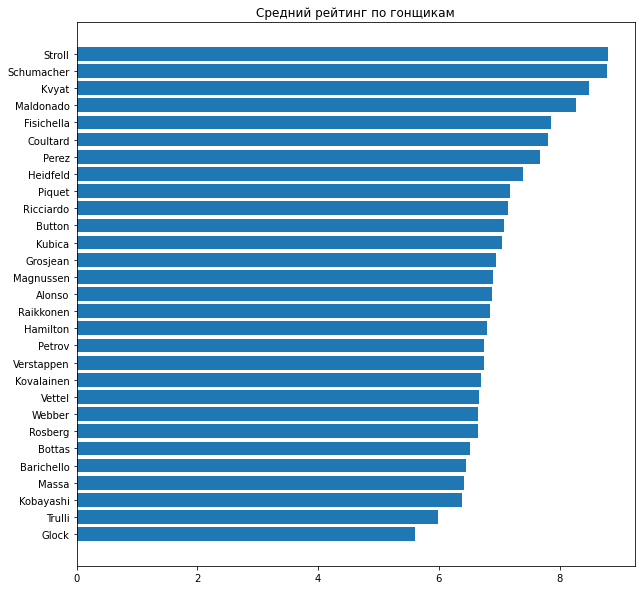

In [16]:
x_racers = []
y_rating = []
for key, value in dict(sorted(racer_mean.items(), key=lambda item: -item[1])).items():
    x_racers.append(key)
    y_rating.append(racer_mean[key])
x_racers = x_racers[::-1]
y_rating = y_rating[::-1]
plt.figure(figsize=(10, 10))
plt.barh(x_racers, y_rating)
plt.title("Средний рейтинг по гонщикам")

Является ли этот график показательным? Не совсем. К примеру коварный Stroll, который занимает 1-ое место по среднему рейтингу в гонках, лишь один раз занял призовое место (да и то 3). И в целом примерно топ-7 по среднему рейтингу в соревнованиях практически не участвовали. Наглядно это показывает следующий график

Text(0.5, 1.0, 'Количество участий у топа по среднему рейтингу')

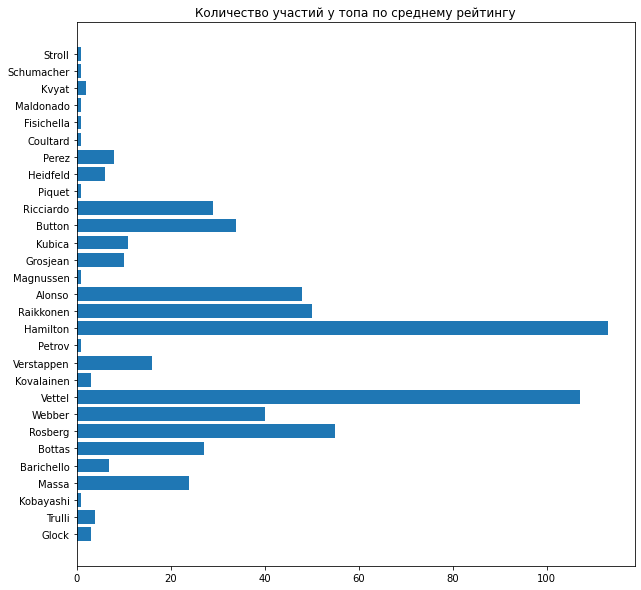

In [21]:
x_racers = []
y_prizes = []

for key, value in dict(sorted(racer_mean.items(), key=lambda item: -item[1])).items():
    prizes = len(df[df["ПЕРВОЕ МЕСТО"] == key]) + len(df[df["ВТОРОЕ МЕСТО"] == key]) + len(df[df["ТРЕТЬЕ МЕСТО"] == key])
    x_racers.append(key)
    y_prizes.append(prizes)
x_racers = x_racers[::-1]
y_prizes = y_prizes[::-1]
plt.figure(figsize=(10, 10))
plt.barh(x_racers, y_prizes)
plt.title("Количество участий у топа по среднему рейтингу")

Построим теперь тот же самый график (по среднему рейтингу) для тех, кто участвовал в соревнованиях $\geq 20$ раз:

In [22]:
threshold = 20

racer_ratings_20 = {}

racer_mean_20 = {}

for index, row in df.iterrows():
    for racer in [row["ПЕРВОЕ МЕСТО"], row["ВТОРОЕ МЕСТО"], row["ТРЕТЬЕ МЕСТО"]]:
        if racer_ratings_20.get(racer) == None:
            racer_ratings_20[racer] = []
        racer_ratings_20[racer].append(row["РЕЙТИНГ"])

for key, value in racer_ratings_20.items():
    if len(value) >= threshold:
        racer_mean_20[key] = sum(value) / len(value)

Text(0.5, 1.0, 'Средний рейтинг по гонщикам, которые участвовали >= 20 раз')

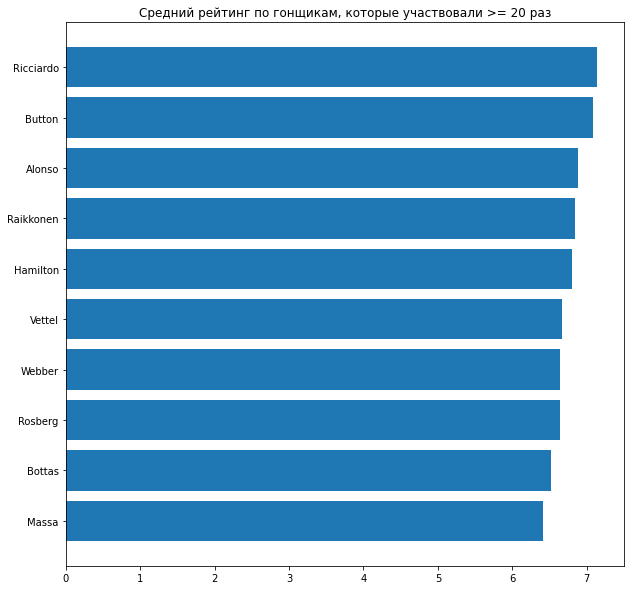

In [23]:
x_racers_20 = []
y_rating_20 = []
for key, value in dict(sorted(racer_mean_20.items(), key=lambda item: -item[1])).items():
    x_racers_20.append(key)
    y_rating_20.append(racer_mean_20[key])
x_racers_20 = x_racers_20[::-1]
y_rating_20 = y_rating_20[::-1]
plt.figure(figsize=(10, 10))
plt.barh(x_racers_20, y_rating_20)
plt.title("Средний рейтинг по гонщикам, которые участвовали >= 20 раз")

Посмотрим теперь пилотов, гонки с которым чаще других имеют более высокую оценку среди аудитории.

Это можно интерпретировать по-разному. Давайте посчитаем следующую величину: топ гонщиков по доле гонок, попавших в топ 20% по рейтингу. Причем среди гонщиков, которые участвовали хотя бы в 20 гонках (другие не очень интересны).

In [24]:
rating_percentage = 80 # top 20% - is 80% quantile
rating_threshold = df['РЕЙТИНГ'].quantile(rating_percentage / 100)
print(rating_threshold)
racer_good_count = {}

for key, value in racer_ratings_20.items():
    if len(value) >= 20:
        cnt = len([x for x in value if x >= rating_threshold])
        racer_good_count[key] = cnt

7.9474


Text(0.5, 1.0, 'Топ гонщиков с самой высокой долей "хороших" гонок')

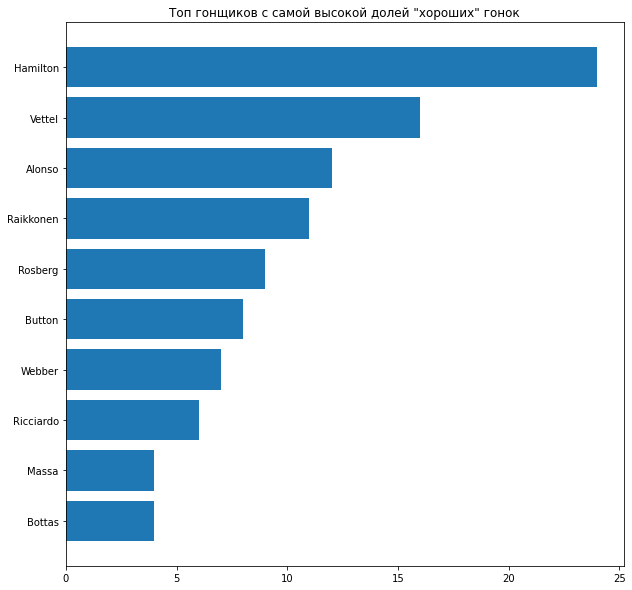

In [25]:
x_racers_20 = []
y_count_20 = []
for key, value in dict(sorted(racer_good_count.items(), key=lambda item: -item[1])).items():
    x_racers_20.append(key)
    y_count_20.append(racer_good_count[key])
x_racers_20 = x_racers_20[::-1]
y_count_20 = y_count_20[::-1]
plt.figure(figsize=(10, 10))
plt.barh(x_racers_20, y_count_20)
plt.title("Топ гонщиков с самой высокой долей \"хороших\" гонок")

В конце мы наконец увидели, что действительно, гонщики с хорошим рейтингом и успешными гонками, о которых мы говорили в начале, формулируя гипотезу, действительно Феттель, Алонсо и Хэмильтон

# Для личного интереса  

Рассмотрим две наиболее популярные гонки в каждом году и попытаемся понять, что вызвало такой всплеск популярности у болельщиков. 

In [27]:
df.groupby("ГОД").apply(lambda x : x.sort_values(by="РЕЙТИНГ", ascending=False).head(2))

ГОД  НОМЕР       НАЗВАНИЕ ГП ПЕРВОЕ МЕСТО ВТОРОЕ МЕСТО  \
ГОД                                                                 
2008 9    2008     18      Brazilian GP        Massa       Alonso   
     14   2008      6         Monaco GP     Hamilton       Kubica   
2009 25   2009     16      Brazilian GP       Webber       Kubica   
     18   2009      1     Australian GP       Button   Barichello   
2010 52   2010      8       Canadian GP     Hamilton       Button   
     46   2010      2     Australian GP       Button       Kubica   
2011 66   2011      3        Chinese GP     Hamilton       Vettel   
     70   2011      7       Canadian GP       Button       Vettel   
2012 85   2012     20      Brazilian GP       Button       Alonso   
     82   2012     18      Abu Dhabi GP    Raikkonen       Alonso   
2013 106  2013      4        Bahrain GP       Vettel    Raikkonen   
     93   2013      1     Australian GP    Raikkonen       Alonso   
2014 127  2014      7       Canadian GP    Ricciardo      Rosberg   
     114  2014     11      Hungarian GP    Ricciardo       Alonso   
2015 131  2015     10      Hungarian GP       Vettel        Kvyat   
     137  2015     16  United States GP     Hamilton      Rosberg   
2016 164  2016      5        Spanish GP   Verstappen    Raikkonen   
     160  2016     20      Brazilian GP     Hamilton      Rosberg   
2017 187  2017      8     Azerbaijan GP    Ricciardo       Bottas   
     182  2017      3        Bahrain GP       Vettel     Hamilton   
2018 190  2018     10        British GP       Vettel     Hamilton   
     195  2018      3        Chinese GP    Ricciardo       Bottas   

         ТРЕТЬЕ МЕСТО  РЕЙТИНГ  
ГОД                             
2008 9      Raikkonen    8.756  
     14         Massa    8.177  
2009 25      Hamilton    8.309  
     18        Trulli    7.937  
2010 52        Alonso    8.668  
     46         Massa    8.638  
2011 66        Webber    9.241  
     70        Webber    9.095  
2012 85         Massa    9.449  
     82        Vettel    8.854  
2013 106     Grosjean    7.826  
     93        Vettel    7.698  
2014 127       Vettel    9.190  
     114     Hamilton    9.140  
2015 131    Ricciardo    9.110  
     137       Vettel    9.100  
2016 164       Vettel    8.720  
     160   Verstappen    8.200  
2017 187       Stroll    8.800  
     182       Bottas    7.900  
2018 190    Raikkonen    8.690  
     195    Raikkonen    8.590

Как видно из графика, гран-при с наивысшим рейтингом (почти 9,5!) стал финальный этап в Бразилии. Если обратиться к истории, то можно узнать, что именно на этот гран-при пришлась разязка сезона: гонка решала, кто из гонщиков получит в 2012 году чемпионский титул. Сама гонка выдалась очень насыщенной, со множеством аварий, победу одержал «мастер дождевых гонок» - Дженсон Баттон, а Фернандо Алонсо,который в гонке финишировал вторым, лишился очередного титула. Словом, поклонники гонок не зря ставят высокие оценки определенным из них - ведь гораздо интереснее следить за накалом страстей, чем за привычным и для кого-то убаюкивающим ходом гоночных болидов.

**В конце интересно посмотреть, кто стал победителем гонок, которые вошли в топ-10 зрительских симпатий. Построим график!**

In [28]:
y_country = []
x_rating = []
name = []
for index, row in df.sort_values("РЕЙТИНГ", ascending=False).head(10).iterrows():
    x_rating.append(row["РЕЙТИНГ"])
    y_country.append(row["НАЗВАНИЕ ГП"])
    name.append(row["ПЕРВОЕ МЕСТО"])


Text(0.5, 1.0, 'Топ-10 гонок')

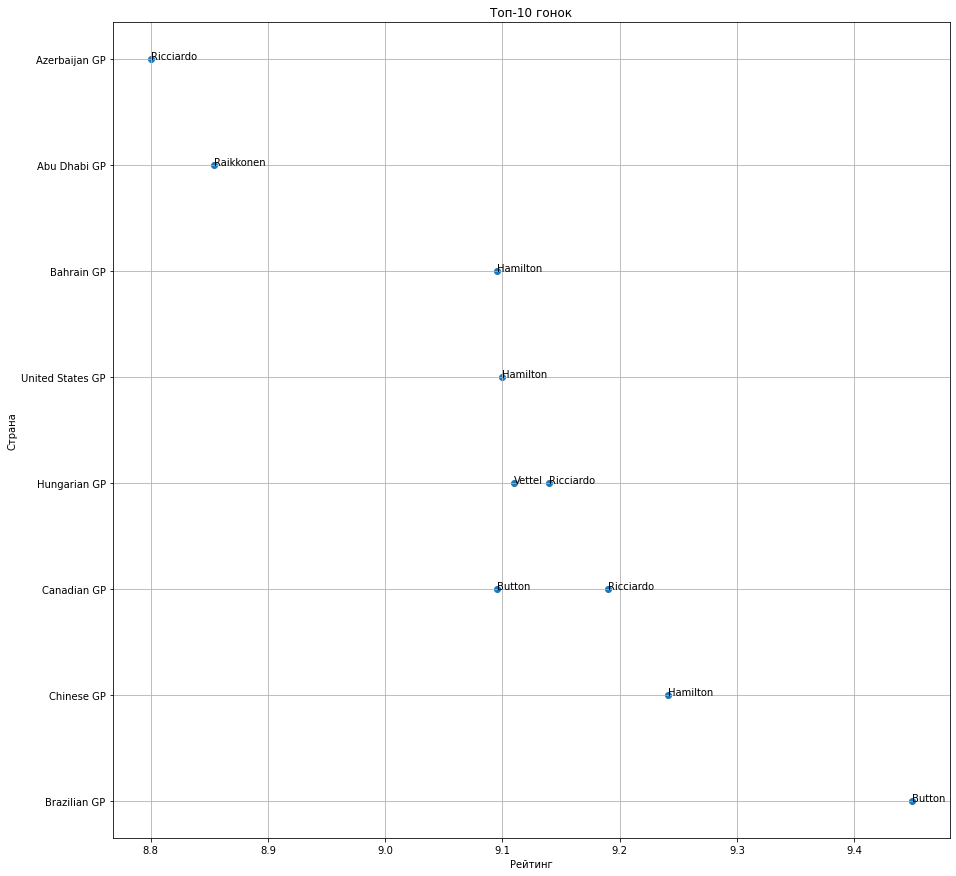

In [29]:
plt.figure(figsize=(15, 15))
plt.scatter(x_rating, y_country)
for i in range(len(x_rating)):
    plt.annotate(name[i], (x_rating[i], y_country[i]))
plt.grid()
plt.xlabel("Рейтинг")
plt.ylabel("Страна")
plt.title("Топ-10 гонок")

На этом завершаем анализ нашего небольшого датасета. Интересно, что в ходе его анал